#### *Trabalho de Processamento de Big Data | Licenciatura em Ciência de Dados 2023/24 | CDB1*

Docente: João Oliveira<br><br>

- David Franco, nº110733

- Felipe Pereira, nº110861

- João Dias, nº110305

- Samuel Ricardo, nº110884<br><br>

https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

Version 9 (10.11 GB) | Created by John Holz | Data Update 2023/01/30

## **Índice**

[Introdução](#introdução)

[1. Importação e depuração dos dados](#1-importação-e-depuração-dos-dados)

[2. Análise exploratória dos dados](#2-análise-exploratória-dos-dados)

[3. Gráficos e visualização](#3-gráficos-e-visualização)

[4. Análise dos resultados de modeling](#4-análise-dos-resultados-de-modeling)

[Principais conclusões](#principais-conclusões)

## **Introdução**

Este trabalho, inserido na disciplina de Processamento de Big Data, teve como propósito analisar dados e elaborar modelos de previsão para as condições meteorológicas do Brasil. Os dados foram recolhidos de várias estações meteorológicas em todo o país, abrangendo o período de 2000 a 2021 e obtidos a partir de um conjunto disponível no Kaggle. O processo iniciou-se com a importação e depuração dos dados, incluindo o tratamento de valores omissos e duplicados. Foi realizada uma análise exploratória detalhada, acompanhada de gráficos que ilustram a evolução de variáveis como temperatura, pressão atmosférica, precipitação, entre outras, ao longo do tempo. Com base nesta análise, foram desenvolvidos modelos de previsão para dois objetivos distintos: por um lado procurou-se prever a ocorrência de chuva numa determinada hora e por outro as temperaturas médias por hora.

## **1. Importação e depuração dos dados**

O conjunto de dados "Clima Meteorológico Superficial do Brasil - Horário", utilizado inicialmente, abrange mais de 10 GB de dados distribuídos em vários ficheiros CSV. Esses dados são provenientes de 122 estações meteorológicas espalhadas por todo o Brasil, que reportam informações climáticas a cada hora ao longo do período entre os anos 2000 e 2021.

Estes dados estão organizados em cinco conjuntos de ficheiros, cada um representando uma das cinco grandes regiões do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste e Sul). Além disso, existe um ficheiro dedicado às informações sobre as estações meteorológicas e outro ficheiro que descreve as 26 variáveis presentes nos conjuntos de dados climáticos.

Antes de procedermos à importação dos ficheiros, foi criada uma sessão Spark para registar todo o processo de importação e depuração dos dados, garantindo uma rastreabilidade eficiente das etapas realizadas.

Para importar os dados, foi utilizado o método `spark.read.csv`, configurado com `inferSchema=True`, permitindo a inferência automática dos tipos de dados de cada variável. Este procedimento simplificou o processo de importação e garantiu a integridade dos dados, sendo essencial para assegurar uma análise precisa e consistente dos dados climáticos.

No que diz respeito à dimensão dos dados, os ficheiros possuem o seguinte número de observações:

|Ficheiro|Nº de observações|
|-|-|
|central_west.csv|11427120|
|north.csv|8392320|
|northeast.csv|16260936|
|south.csv|10284888|
|southeast.csv|15345216|
|stations.csv|622|

As variáveis que estão presentes nos ficheiros das regiões dividem-se da seguinte forma:

- data: data (YYYY-MM-DD)
- hora: hora (HH:00)
- precipitação total, horário (mm): Quantidade de precipitação em milímetros (última hora)
- pressão atmosférica ao nível da estação (mb): Pressão atmosférica ao nível da estação (mb)
- pressão atmosférica máx. na hora ant. (aut) (mb): Pressão atmosférica máxima na hora anterior (mb)
- pressão atmosférica mín. na hora ant. (aut) (mb): Pressão atmosférica mínima na hora anterior (mb)
- radiation (kj/m2): Radiação solar KJ/m2
- temperatura do ar - bulbo seco (°c): Temperatura do ar - bulbo seco (°c)
- temperatura do ponto de orvalho (°c): Temperatura do ponto de orvalho (°c)
- temperatura máxima na hora ant. (aut) (°c): Temperatura máxima na hora anterior (°c)
- temperatura mínima na hora ant. (aut) (°c): Temperatura mínima na hora anterior (°c)
- temperatura orvalho máx. na hora ant. (aut) (°c): Temperatura do ponto de orvalho máxima na hora anterior (°c)
- temperatura orvalho mín. na hora ant. (aut) (°c): Temperatura do ponto de orvalho mínima na hora anterior (°c)
- umidade rel. máx. na hora ant. (aut) (%): Umidade relativa máxima na hora anterior (%)
- umidade rel. mín. na hora ant. (aut) (%): Umidade relativa mínima na hora anterior (%)
- umidade relativa do ar, horária (%): Umidade relativa do ar, horária (%)
- vento direção horária (gr) (° (gr)): Direção do vento (° (gr))
- vento rajada máxima (m/s): Rajada máxima do vento (m/s)
- vento velocidade horária (m/s): Velocidade do vento (m/s)
- região: Regiões geopolíticas do Brasil
- estado: Estado (província)
- estação: Nome da estação (geralmente localização da cidade ou apelido)
- código da estação: Número da estação (número INMET) para a localização
- latitude: Latitude
- longitude: Longitude
- altitude: Elevação

Decidimos traduzir para a língua inglesa e diminuir o comprimento das variáveis no nosso dataset, de modo que fique mais claro e compreensível, originando as seguintes variáveis:

- precipitação total, horário (mm) -> TotalHourlyPrecipitationMm
- pressão atmosférica ao nível da estação (mb) -> HourlyStationLevelAtmosphericPressureMb
- pressão atmosférica máx. na hora ant. (aut) (mb) -> LastHourMaxAtmosphericPressureMb
- pressão atmosférica mín. na hora ant. (aut) (mb) -> LastHourMinAtmosphericPressureMb
- radiation (kj/m2) -> GlobalRadiationKjM2
- temperatura do ar - bulbo seco (°c) -> HourlyDryBulbAirTemperatureC
- temperatura do ponto de orvalho (°c) -> DewPointTemperatureC
- temperatura máxima na hora ant. (aut) (°c) -> LastHourMaxTemperatureC
- temperatura mínima na hora ant. (aut) (°c) -> LastHourMinTemperatureC
- temperatura orvalho máx. na hora ant. (aut) (°c) -> LastHourMaxDewPointTemperatureC
- temperatura orvalho mín. na hora ant. (aut) (°c) -> LastHourMinDewPointTemperatureC
- umidade rel. máx. na hora ant. (aut) (%) -> LastHourMaxRelativeHumidityPercentage
- umidade rel. mín. na hora ant. (aut) (%) -> LastHourMinRelativeHumidityPercentage
- umidade relativa do ar, horária (%) -> HourlyRelativeHumidityPercentage
- vento direção horária (gr) (° (gr)) -> HourlyWindDirectionRadiusDegrees
- vento rajada máxima (m/s) -> MaximumWindGustMs
- vento velocidade horária (m/s) -> HourlyWindSpeedMs
- altitude -> Height


Também ajustamos o tipo de dados para a hora, que ao ser importado para o Spark, acrescentava a data, garantindo assim que apenas a hora no formato HH estivesse presente, evitando a inclusão indevida de dados de data durante a importação para o Spark.

No que diz respeito à qualidade dos dados, verificamos a ausência de valores em falta, no entanto, notamos a presença de numerosas observações com o registo "-9999" em várias variáveis, principalmente na variável "GlobalRadiationKjM2". Dado o contexto dos dados, este valor não faz muito sentido, pelo que consideramos este valor como uma representação de missings. Assim, procedemos à limpeza desses valores, eliminando as entradas que os continham, bem como à exclusão da variável "GlobalRadiationKjM2" devido ao elevado número de missing values que continha. Estas alterações foram aplicadas a todos os conjuntos de dados utilizados, ou seja, para todas as regiões.

Além disso, identificamos valores duplicados no conjunto de dados das estações meteorológicas, pois algumas estações apareciam mais de uma vez no conjunto de dados. Tratavam-se de estações antigas que foram reformuladas e cuja localização (station) mudou ligeiramente, mas que representavam a mesma estação. Por conseguinte, substituímos os registos antigos pelos novos.

Por último, combinamos os conjuntos de dados relativos aos dados climáticos de cada região (centro-oeste, norte, nordeste, sul e sudeste), resultando num conjunto de dados com 49759514 observações, o qual foi armazenado no formato Parquet (all_stations.parquet) para ser utilizado nas fases subsequentes do trabalho.

## **2. Análise exploratória dos dados**

Para a realização desta fase, primeiramente é feito a criação de uma nova sessão Spark (WeatherBrazilEDA) exclusiva para a Análise exploratória dos dados e importamos o ficheiro Parquet "all.stations" criado na fase anterior.

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col, count, row_number, date_format, mean, min, max, stddev, year, month, avg, sum
from datetime import datetime

import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Create the Spark session

spark = SparkSession.builder \
    .appName("WeatherBrazilReport") \
    .config("spark.sql.shuffle.partitions", 512) \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

In [4]:
df_all_stations = spark.read.parquet("./all_stations.parquet")

O dataset importado possui a seguinte dimensão:

In [5]:
print("Número de observações: ",df_all_stations.count())
print("Número de variáveis: ", len(df_all_stations.columns))

Número de observações:  49759514
Número de variáveis:  26


Divido entre as seguintes 26 variáveis: 

In [6]:
df_all_stations.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Hour: string (nullable = true)
 |-- TotalHourlyPrecipitationMm: double (nullable = true)
 |-- HourlyStationLevelAtmosphericPressureMb: double (nullable = true)
 |-- LastHourMaxAtmosphericPressureMb: double (nullable = true)
 |-- LastHourMinAtmosphericPressureMb: double (nullable = true)
 |-- HourlyDryBulbAirTemperatureC: double (nullable = true)
 |-- DewPointTemperatureC: double (nullable = true)
 |-- LastHourMaxTemperatureC: double (nullable = true)
 |-- LastHourMinTemperatureC: double (nullable = true)
 |-- LastHourMaxDewPointTemperatureC: double (nullable = true)
 |-- LastHourMinDewPointTemperatureC: double (nullable = true)
 |-- LastHourMaxRelativeHumidityPercentage: integer (nullable = true)
 |-- LastHourMinRelativeHumidityPercentage: integer (nullable = true)
 |-- HourlyRelativeHumidityPercentage: integer (nullable = true)
 |-- HourlyWindDirectionRadiusDegrees: integer (nullable = true)
 |-- Maximum

Para enriquecer a nossa análise, criámos uma nova variável, "AverageTemperatureC", que representa a média das temperaturas máxima e mínima da última hora, calculada a partir das variáveis existentes "LastHourMaxTemperatureC" e "LastHourMinTemperatureC".

In [7]:
df_all_stations = df_all_stations.withColumn(
    "AverageTemperatureC",
    (col("LastHourMaxTemperatureC") + col("LastHourMinTemperatureC")) / 2
)

Além disso, realizámos a análise descritiva das variáveis numéricas de modo a obter uma compreensão detalhada das características dos dados, incluindo medidas de tendência central, dispersão e distribuição.

In [8]:
# Colunas numéricas
numeric_columns = [
    'TotalHourlyPrecipitationMm', 'HourlyStationLevelAtmosphericPressureMb',
    'LastHourMaxAtmosphericPressureMb', 'LastHourMinAtmosphericPressureMb',
    'HourlyDryBulbAirTemperatureC', 'DewPointTemperatureC',
    'LastHourMaxTemperatureC', 'LastHourMinTemperatureC', "AverageTemperatureC",
    'LastHourMaxDewPointTemperatureC', 'LastHourMinDewPointTemperatureC',
    'LastHourMaxRelativeHumidityPercentage', 'LastHourMinRelativeHumidityPercentage',
    'HourlyRelativeHumidityPercentage', 'HourlyWindDirectionRadiusDegrees',
    'MaximumWindGustMs', 'HourlyWindSpeedMs','Height'
]
desc_stats = df_all_stations.select(numeric_columns).describe().toPandas().transpose()
desc_stats

,0,1,2,3,4
summary,count,mean,stddev,min,max
TotalHourlyPrecipitationMm,49759514,0.15276609011914452,1.2644366957327162,0.0,100.0
HourlyStationLevelAtmosphericPressureMb,49759514,965.2958074570444,37.44976884102553,720.1,1050.0
LastHourMaxAtmosphericPressureMb,49759514,965.5655641713201,37.45299070576381,720.3,1050.0
LastHourMinAtmosphericPressureMb,49759514,965.0045343790938,37.436673636584565,720.0,1049.6
HourlyDryBulbAirTemperatureC,49759514,23.41319106533029,5.549682278526645,-7.7,45.0
DewPointTemperatureC,49759514,17.177764288453435,4.760310674870106,-27.5,44.7
LastHourMaxTemperatureC,49759514,24.07602705886555,5.6797061254375425,-7.6,45.0
LastHourMinTemperatureC,49759514,22.783562140498123,5.4138710682566815,-9.5,44.9
AverageTemperatureC,49759514,23.42979459968197,5.5262808169749835,-7.699999999999999,44.95


Ao analisar a tabela de estatísticas descritivas, constatamos que todas as colunas possuem o mesmo número de observações, indicando a ausência de valores omissos. Este resultado era esperado, pois os valores omissos foram tratados na fase anterior. No que diz respeito à média e ao desvio padrão das variáveis, é difícil fazer uma generalização, já que os valores variam significativamente dependendo da variável, além de cada uma possuir a sua própria unidade de medida.

## **3. Gráficos e visualização**

Em relação ao número de registos por região, que pode ser visualizado no gráfico abaixo, é notável a disparidade entre elas. A região sudeste apresenta o maior número de registos, enquanto a região norte possui o menor número. Este padrão era esperado, uma vez que estas regiões correspondem, respetivamente, às áreas mais e menos populosas do país.

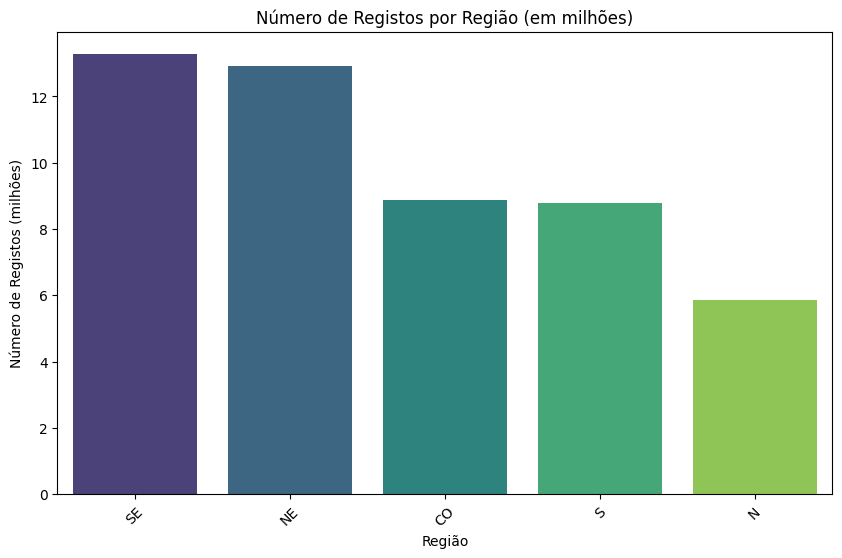

In [9]:
# Realizar a agregação com PySpark
count_by_region = df_all_stations.groupBy("Region").agg(
    count("*").alias("Number of Records")
).orderBy(col("Number of Records").desc())

# Converter para Pandas DataFrame
count_by_region_pd = count_by_region.toPandas()

# Converter o número de registos para milhões
count_by_region_pd['Number of Records'] = count_by_region_pd['Number of Records'] / 1e6

# Plotar o gráfico usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Number of Records', data=count_by_region_pd, palette='viridis')
plt.title('Número de Registos por Região (em milhões)')
plt.xlabel('Região')
plt.ylabel('Número de Registos (milhões)')
plt.xticks(rotation=45)
plt.show()

#### **Evoluções anuais**

Outro aspeto crucial para a análise climática é a temperatura média. Com isto em mente, criámos um gráfico de área que representa tanto a temperatura média anual como a temperatura média mensal para cada ano contemplado no dataset. A partir de sua análise é possível observar a flutuação ao longo dos anos, embora, com uma tendência geral de ligeiro aumento ao longo do tempo. As temperaturas variam entre 22.6ºC e 24ºC, onde o valor mais alto se registou nos anos de 2015 e 2021.

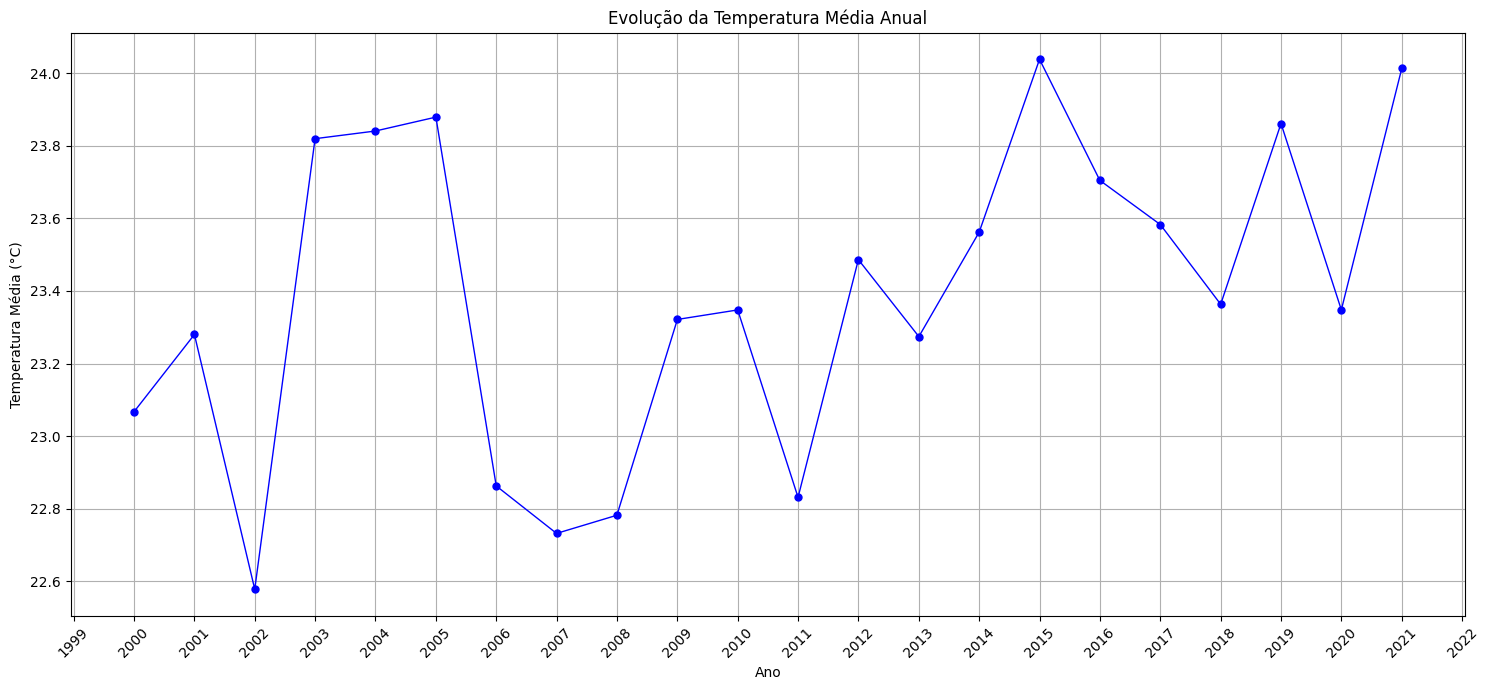

In [10]:
avg_temp_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    avg("AverageTemperatureC").alias("Average Temperature")
).orderBy("Year")

result_temp = avg_temp_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_temp]  
average_temperatures = [row['Average Temperature'] for row in result_temp]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_temperatures, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)

plt.title('Evolução da Temperatura Média Anual')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Mudança para formatar apenas o ano

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

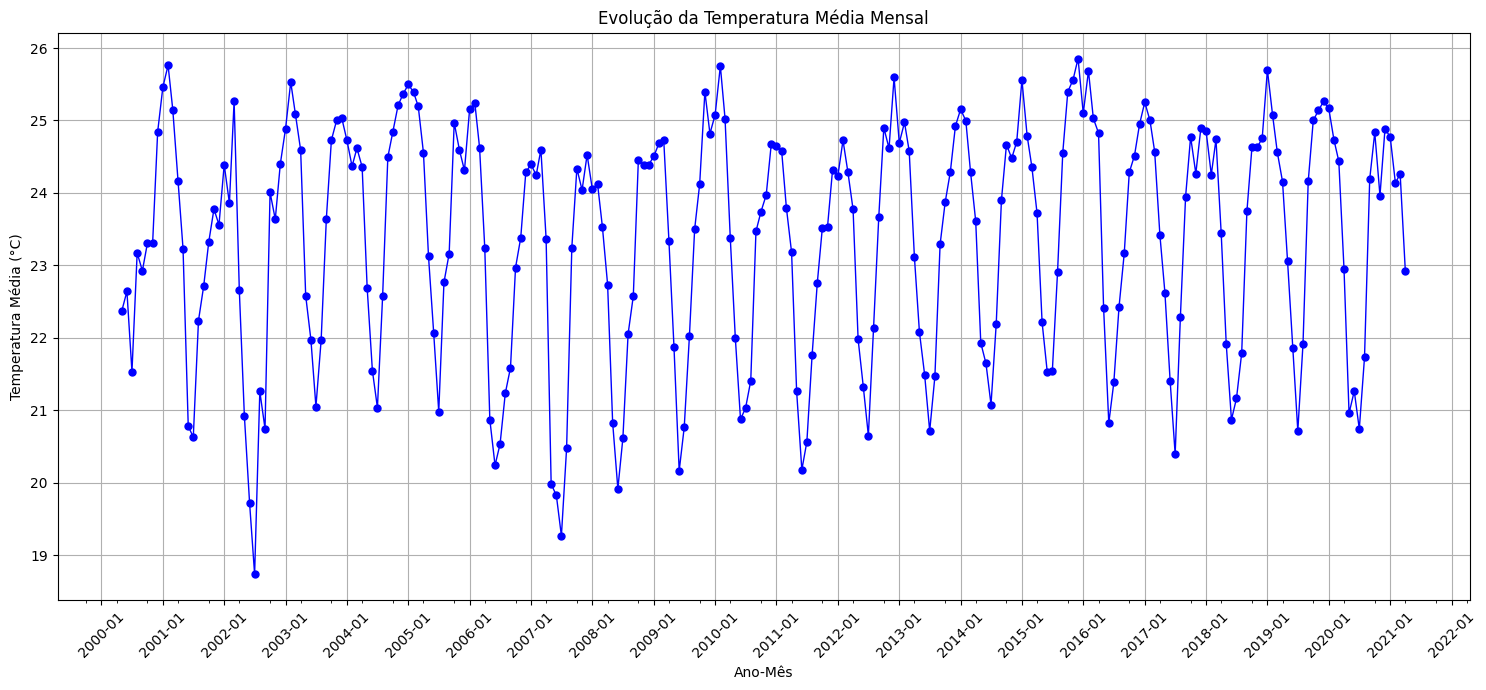

In [11]:
avg_temp_by_month = df_all_stations.groupBy(year("Date").alias("Year"), month("Date").alias("Month")).agg(
    avg("AverageTemperatureC").alias("Average Temperature")
).orderBy("Year", "Month")

result_temp = avg_temp_by_month.collect()

dates = [datetime(row['Year'], row['Month'], 1) for row in result_temp]  
average_temperatures = [row['Average Temperature'] for row in result_temp]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_temperatures, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)  

plt.title('Evolução da Temperatura Média Mensal')
plt.xlabel('Ano-Mês')
plt.ylabel('Temperatura Média (°C)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=6))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xticks(rotation=45) 
plt.grid(True)  
plt.tight_layout()
plt.show()

De seguida foi feita a análise da precipitação total e a precipitação anual. É possível verificar que o ano de 2021 apresenta uma precipitação total bastante baixa em relação aos restantes anos,no entanto, isto só acontece pois apenas existem dados até abril desse mesmo ano. É possível concluir, também que, a média tende a ser mais alta em anos com menor participação total, sugerindo que anos mais secos tendem a ter eventos de chiva mais intensos por curtos períodos, enquanto anos mais chuvosos distribuem a sua precipitação de uma maneira mais uniforme.

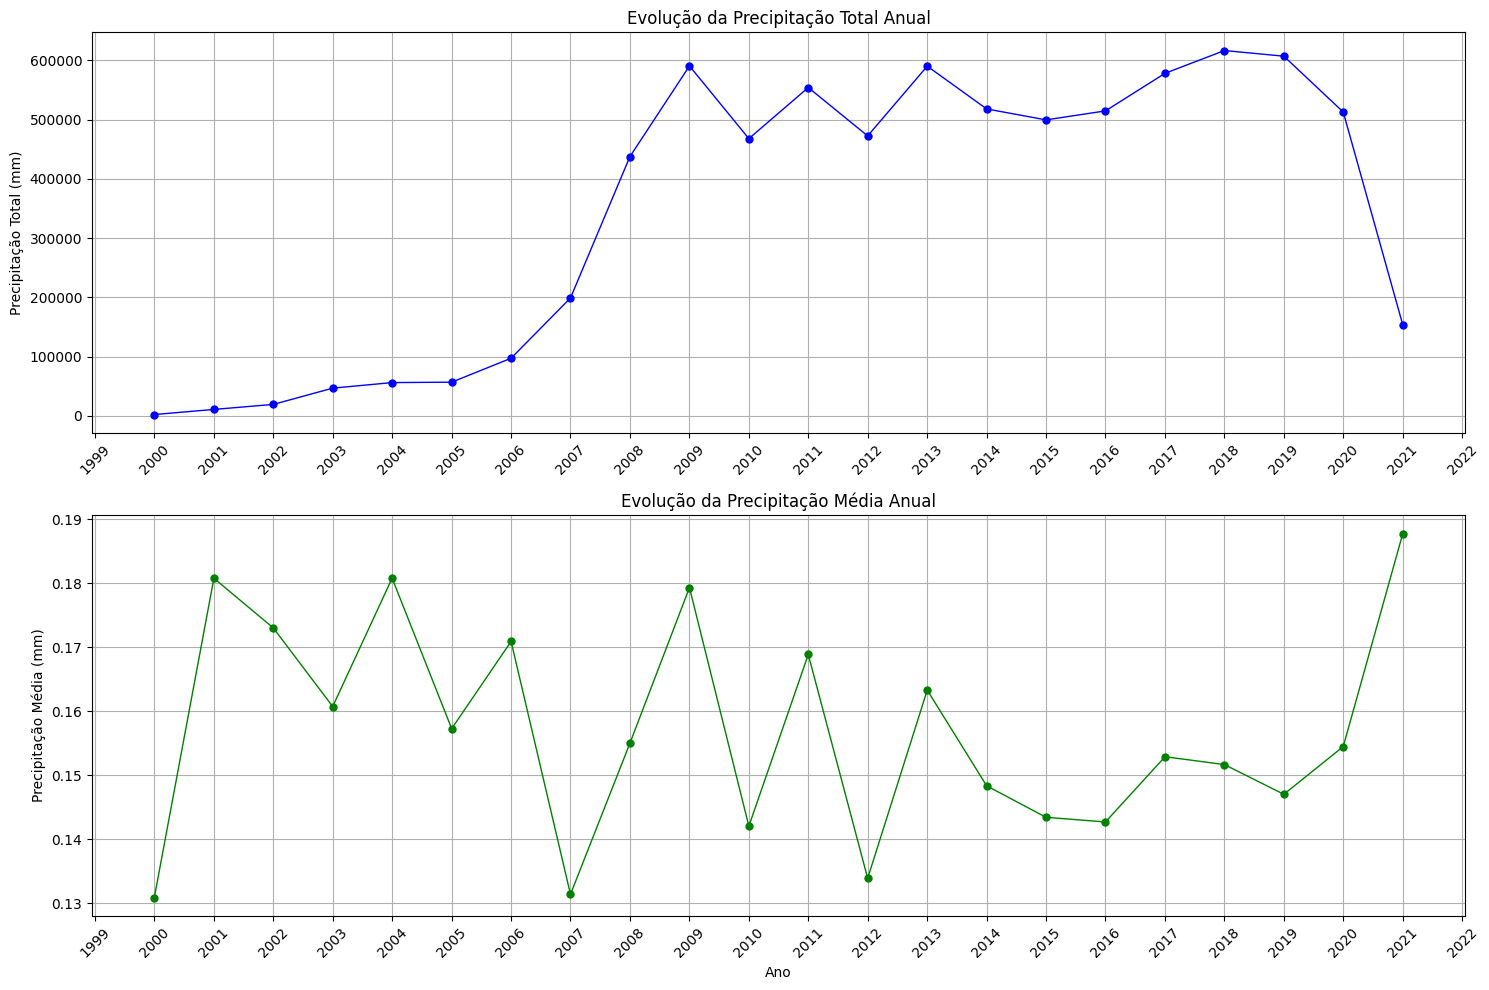

In [12]:
precipitation_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    sum("TotalHourlyPrecipitationMm").alias("Total Precipitation"),
    avg("TotalHourlyPrecipitationMm").alias("Average Precipitation")
).orderBy("Year")

result_precipitation = precipitation_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_precipitation]  
total_precipitations = [row['Total Precipitation'] for row in result_precipitation]
average_precipitations = [row['Average Precipitation'] for row in result_precipitation]

plt.figure(figsize=(15, 10))

# Gráfico para a precipitação total anual
plt.subplot(2, 1, 1)
plt.plot(dates, total_precipitations, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Precipitação Total Anual')
plt.ylabel('Precipitação Total (mm)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico para a precipitação média anual
plt.subplot(2, 1, 2)
plt.plot(dates, average_precipitations, linestyle='-', color='green', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Precipitação Média Anual')
plt.xlabel('Ano')
plt.ylabel('Precipitação Média (mm)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

O gráfico apresenta a evolução da pressão atmosférica média anual ao longo dos anos. É possível observar uma variação de pressão com momentos de queda e aumento abruptos, como o pico em 2005 e uma descida acentuada em 2021, que é explicada por termos apenas dados até abril desse mesmo ano. A tendência geral mostra uma estabilidade na pressão ao longo dos anos, com uma faixa de variação relativamente constante, seguida por uma queda no ano de 2020.

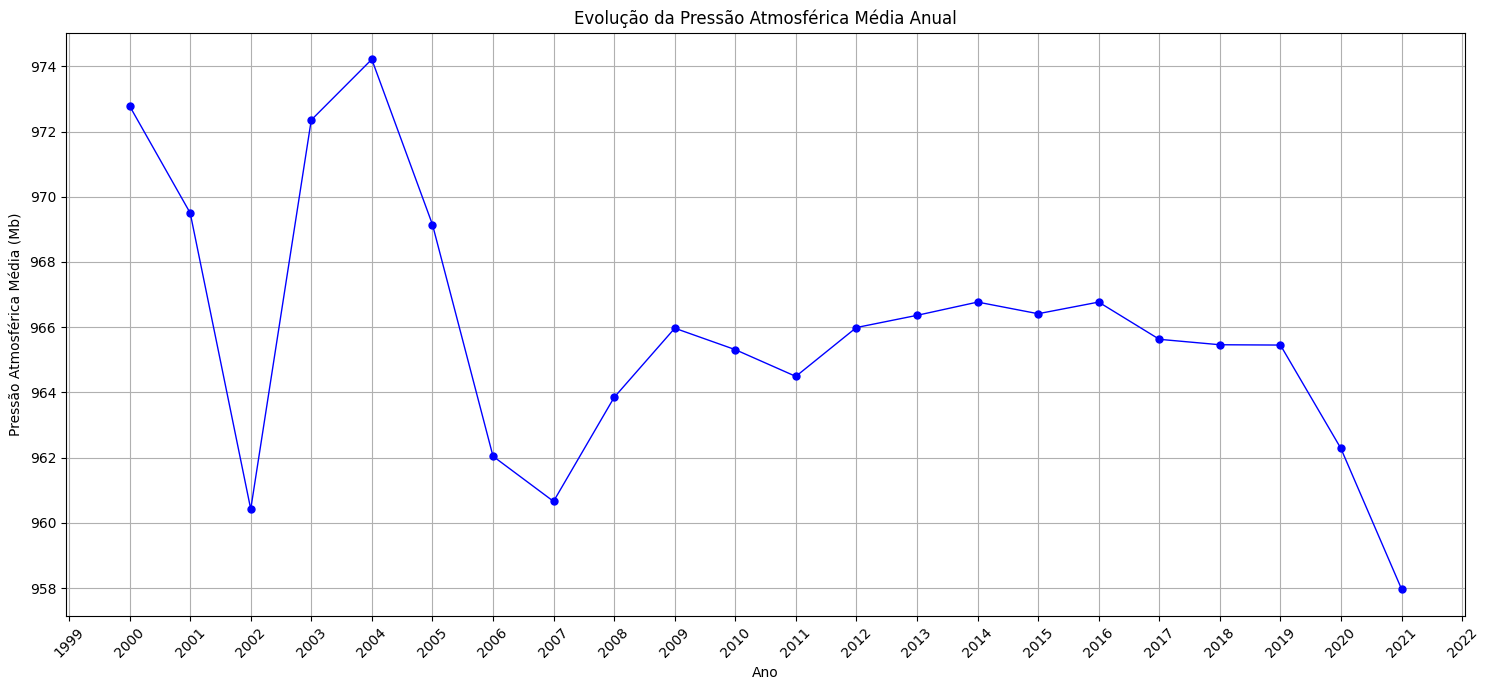

In [13]:
pressure_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    avg("HourlyStationLevelAtmosphericPressureMb").alias("Average Atmospheric Pressure")
).orderBy("Year")

result_pressure = pressure_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_pressure]
average_pressures = [row['Average Atmospheric Pressure'] for row in result_pressure]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_pressures, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Pressão Atmosférica Média Anual')
plt.xlabel('Ano')
plt.ylabel('Pressão Atmosférica Média (Mb)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A evolução da humidade relativa média anual mostra flutuações significativas ao longo dos anos, com picos e quedas , como observado nos anos de 2007, 2009 e 2012. As variações observadas ao longo do tempo sugerem influências cíclicas, indicando um padrão que se repete com algumas variações ao longo dos anos.

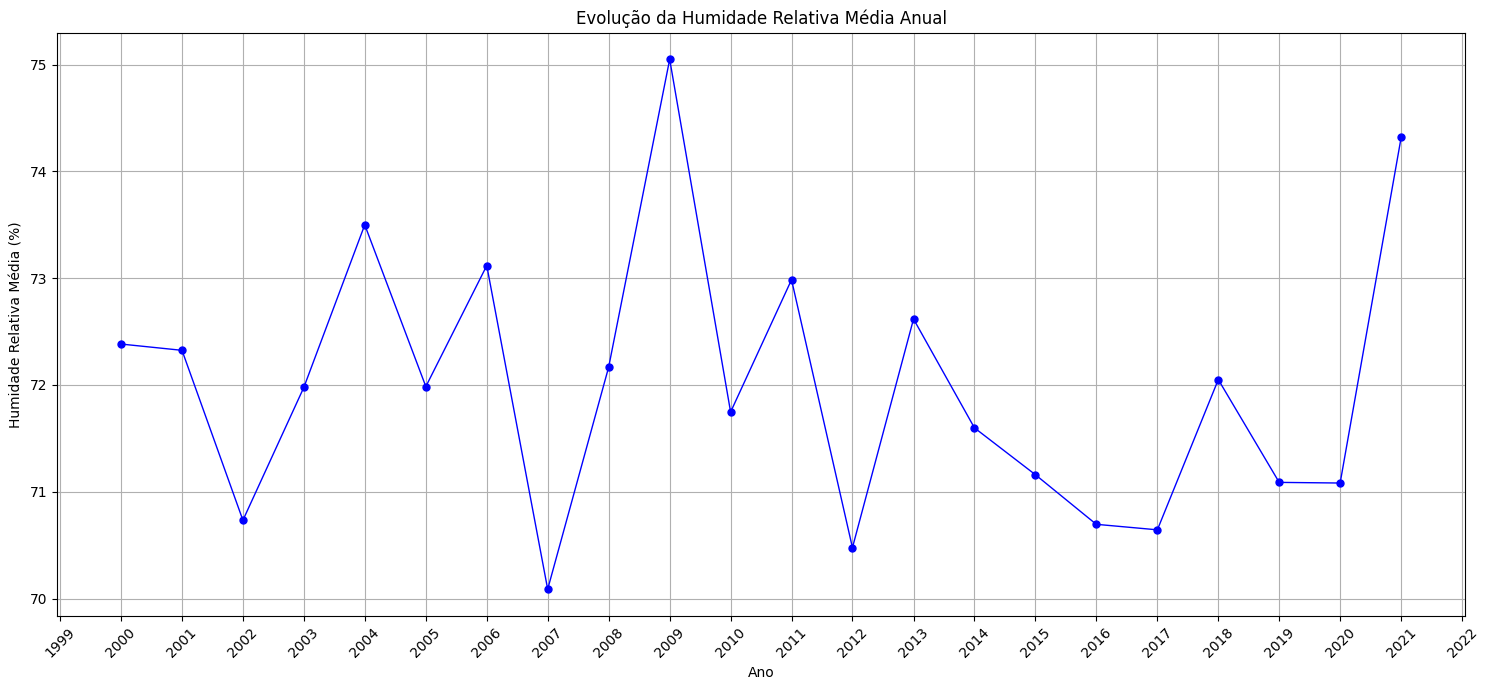

In [14]:
avg_humidity_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    avg("HourlyRelativeHumidityPercentage").alias("Average Relative Humidity")
).orderBy("Year")

result_humidity = avg_humidity_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_humidity]
average_humidities = [row['Average Relative Humidity'] for row in result_humidity]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_humidities, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Humidade Relativa Média Anual')
plt.xlabel('Ano')
plt.ylabel('Humidade Relativa Média (%)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico apresenta da direção média do vento anual, medida em graus. Observa-se uma tendência de diminuição inicial até 2005, o que nos indica uma mudança gradual na origem do vento. Existe também, flutuações com aumentos e quedas até 2015, e depois um aumento mais estável até 2021. Esta variação na direção do vento pode indicar mudanças nos padrões climáticos ao longo dos anos.

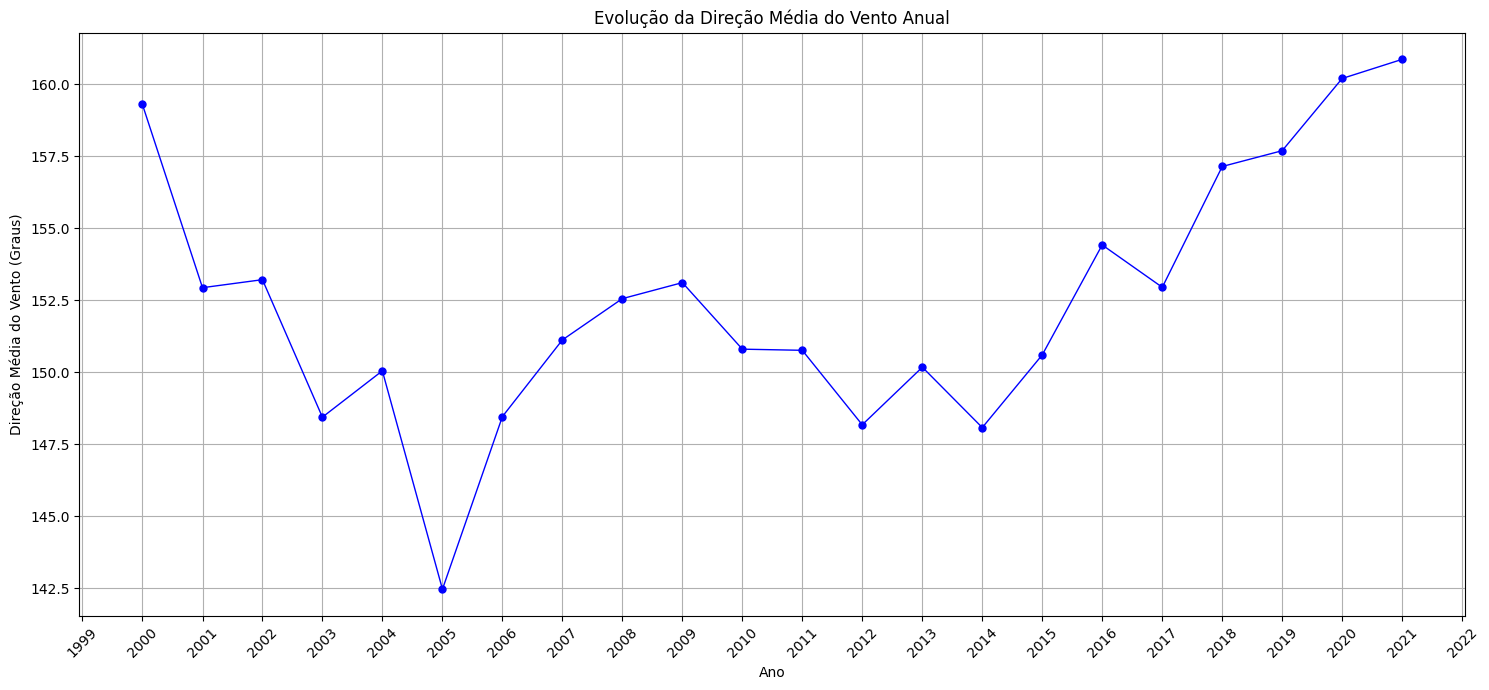

In [15]:
avg_wind_direction_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    avg("HourlyWindDirectionRadiusDegrees").alias("Average Wind Direction")
).orderBy("Year")

result_wind_direction = avg_wind_direction_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_wind_direction]
average_wind_directions = [row['Average Wind Direction'] for row in result_wind_direction]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_wind_directions, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Direção Média do Vento Anual')
plt.xlabel('Ano')
plt.ylabel('Direção Média do Vento (Graus)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

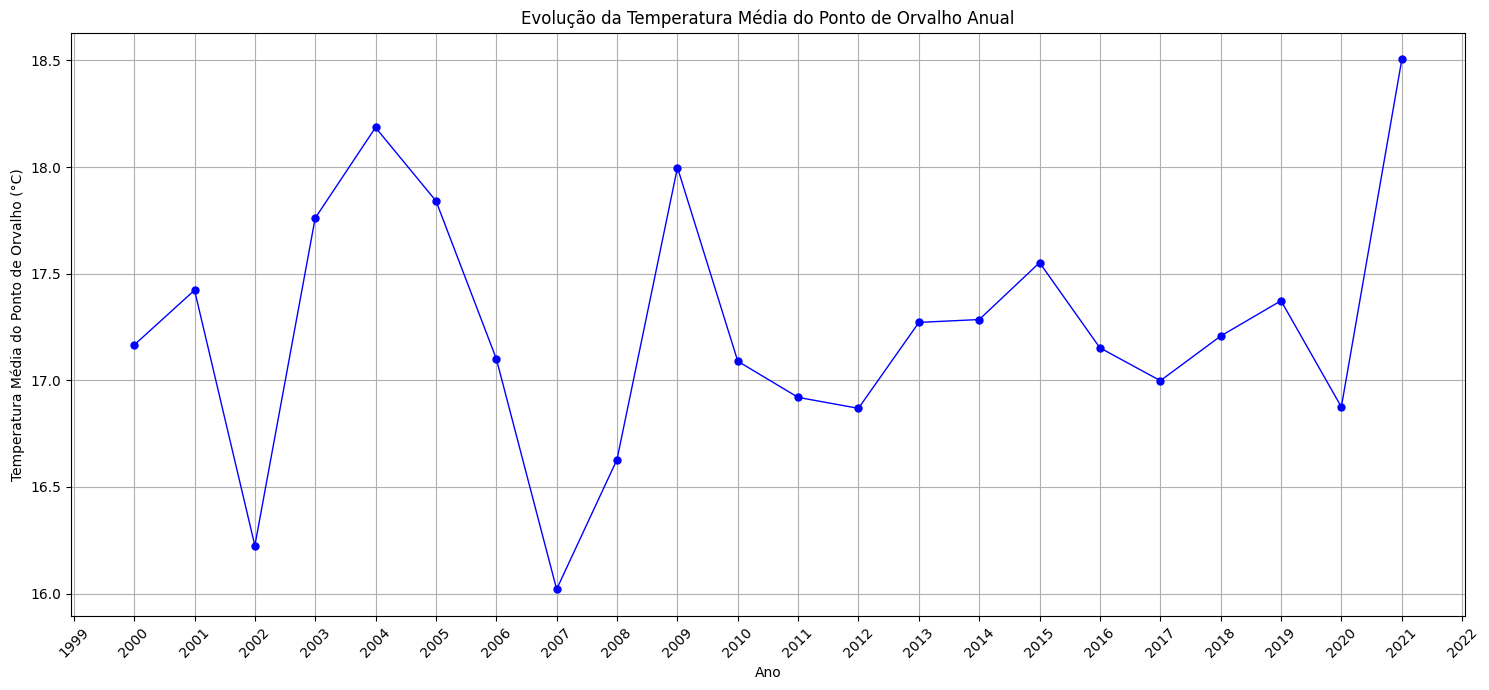

In [16]:
avg_dew_point_by_year = df_all_stations.groupBy(year("Date").alias("Year")).agg(
    avg("DewPointTemperatureC").alias("Average Dew Point Temperature")
).orderBy("Year")

result_dew_point = avg_dew_point_by_year.collect()

dates = [datetime(row['Year'], 1, 1) for row in result_dew_point]
average_dew_point_temperatures = [row['Average Dew Point Temperature'] for row in result_dew_point]

plt.figure(figsize=(15, 7))
plt.plot(dates, average_dew_point_temperatures, linestyle='-', color='blue', marker='o', markersize=5, linewidth=1)
plt.title('Evolução da Temperatura Média do Ponto de Orvalho Anual')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média do Ponto de Orvalho (°C)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A evolução da temperatura média do ponto de orvalho apresentou uma considerável variação entre os anos 2000 e 2010. Entretanto, é notável que entre 2010 e 2020, esta temperatura estabilizou-se, com variações inferiores a 0,5 ºC. Outro aspeto notável é a subida acentuada desta temperatura nos anos de 2003, 2008 e 2021.

#### **Evoluções ao longo do dia (por hora)**

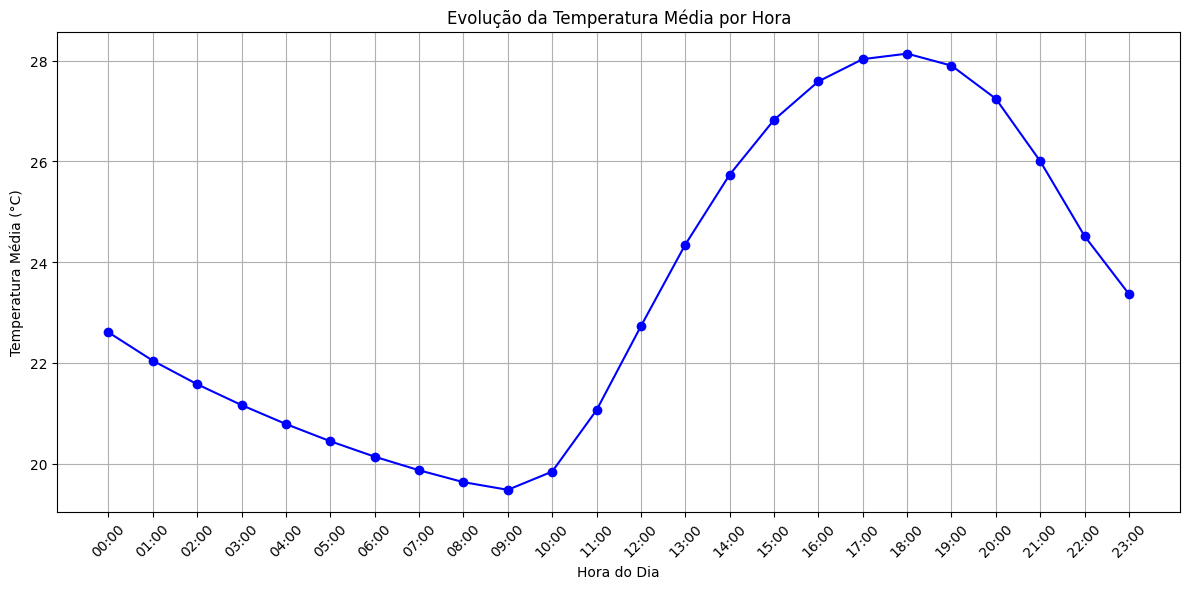

In [17]:
avg_temp_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("AverageTemperatureC").alias("Average Temperature")
).orderBy("Hour")

result_temp_hourly = avg_temp_by_hour.collect()

hours = [row['Hour'] for row in result_temp_hourly]
average_temperatures = [row['Average Temperature'] for row in result_temp_hourly]

plt.figure(figsize=(12, 6))
plt.plot(hours, average_temperatures, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Temperatura Média por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura Média (°C)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

Em relação à evolução da temperatura média durante o dia, visível no gráfico acima, observa-se uma tendência de decréscimo entre 00h e 09h, atingindo um mínimo de pouco menos de 20 ºC às 09h. Este período de queda matinal é típico, pois coincide com o período de menor atividade solar e maior perda de calor noturno.
A partir das 09h, a temperatura começa a subir significativamente devido ao aumento da radiação solar, atingindo um pico às 18h. É estranho que o pico de temperatura ocorra às 18h, uma vez que normalmente o ponto máximo é observado por volta das 13h, quando a atividade solar está no seu auge. Após este horário, a temperatura volta a descer à medida que a radiação solar diminui, alcançando pouco mais de 23 ºC às 23h, refletindo a transição para o período noturno.

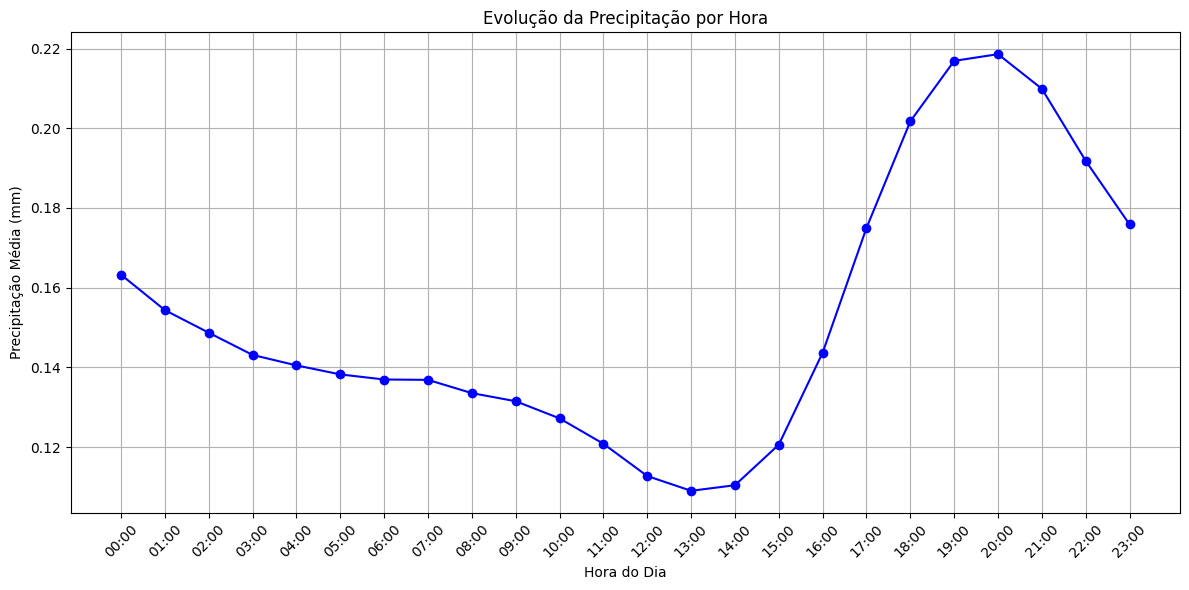

In [18]:
avg_precipitation_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("TotalHourlyPrecipitationMm").alias("Average Precipitation")
).orderBy("Hour")

# Coletar os dados
result_precipitation = avg_precipitation_by_hour.collect()

# Preparar dados para plotagem
hours = [row['Hour'] for row in result_precipitation]
average_precipitations = [row['Average Precipitation'] for row in result_precipitation]

# Plotar o gráfico da precipitação média por hora
plt.figure(figsize=(12, 6))
plt.plot(hours, average_precipitations, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Precipitação por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Precipitação Média (mm)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

No que diz respeito à evolução da precipitação média por hora, relatada no gráfico acima, é percetível que a precipitação média apresenta uma tendência de decréscimo entre as 00h e 13h, atingindo o seu mínimo de pouco mais de 0,11 mm às 13h. Após este período, observa-se um aumento gradual da precipitação, que atinge o seu máximo às 20h. Este padrão sugere que as chuvas são mais comuns no final da tarde e início da noite, evento comum em cidades como Belém e São Paulo.

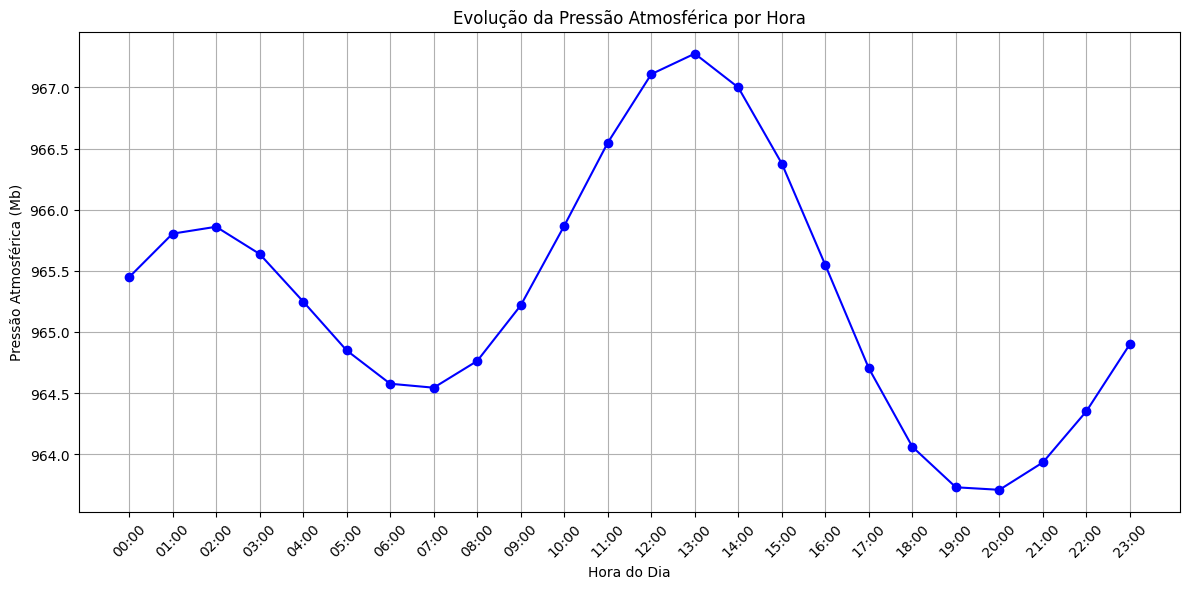

In [19]:
avg_pressure_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("HourlyStationLevelAtmosphericPressureMb").alias("Average Atmospheric Pressure")
).orderBy("Hour")

result_pressure = avg_pressure_by_hour.collect()

hours = [row['Hour'] for row in result_pressure]
average_pressures = [row['Average Atmospheric Pressure'] for row in result_pressure]

plt.figure(figsize=(12, 6))
plt.plot(hours, average_pressures, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Pressão Atmosférica por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Pressão Atmosférica (Mb)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

No que diz respeito à evolução da pressão atmosférica por hora, conforme ilustrado no gráfico acima, observam-se variações distintas ao longo do dia. A pressão atmosférica começa em torno de 965,5 mb à meia-noite, apresentando uma ligeira subida até aproximadamente as 02h, onde atinge um valor ligeiramente superior a 966 mb. Após este ponto, há uma queda gradual da pressão até alcançar o seu mínimo de pouco menos de 964,5 mb às 06h.

A partir das 06h, a pressão atmosférica começa a aumentar, atingindo um pico notável de 967 mb por volta das 13h. Este comportamento pode estar associado ao aquecimento diurno, que afeta a pressão atmosférica. Após o pico das 13h, a pressão começa a diminuir novamente, alcançando um segundo mínimo em torno das 20h, onde a pressão desce para aproximadamente 964,5 mb.
Este ciclo diário de variação na pressão atmosférica é influenciado por fatores como a radiação solar, o aquecimento e arrefecimento da superfície terrestre, e os padrões de circulação atmosférica (https://www.yumpu.com/pt/document/view/12475108/variacao-diaria-da-pressao-atmosferica-usp).

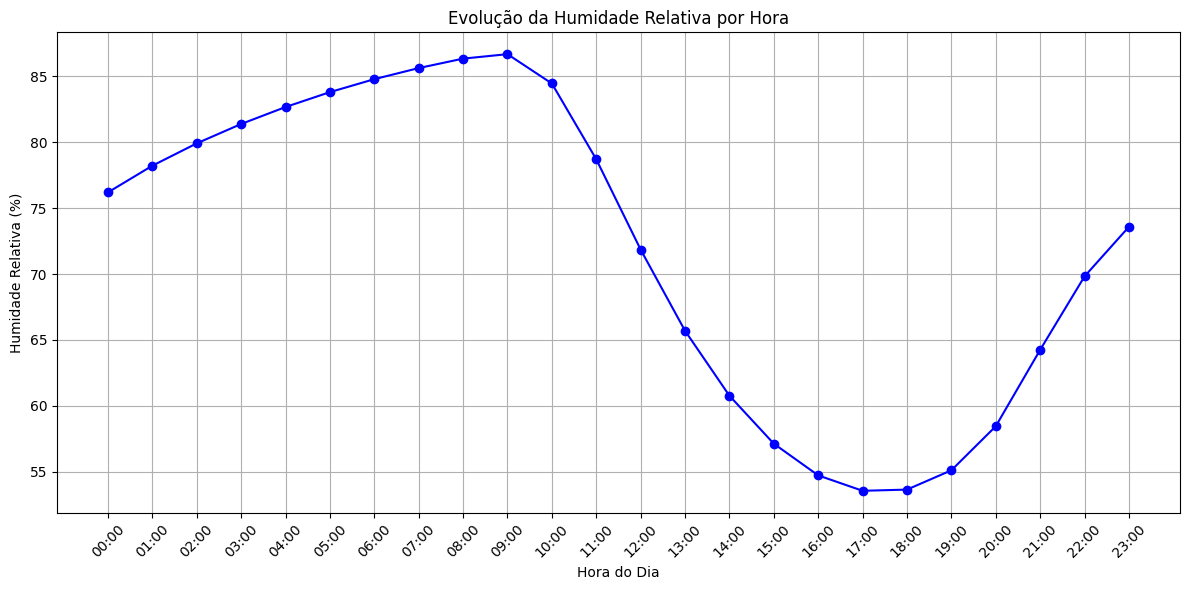

In [20]:
avg_humidity_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("HourlyRelativeHumidityPercentage").alias("Average Relative Humidity")
).orderBy("Hour")

result_humidity = avg_humidity_by_hour.collect()

hours = [row['Hour'] for row in result_humidity]
average_humidities = [row['Average Relative Humidity'] for row in result_humidity]

plt.figure(figsize=(12, 6))
plt.plot(hours, average_humidities, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Humidade Relativa por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Humidade Relativa (%)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

No gráfico acima, que representa a evolução da humidade ao longo do dia, podemos observar um padrão característico de variação. A humidade inicia em torno de 75% à meia-noite e aumenta gradualmente até atingir um pico de pouco mais de 85% por volta das 9h da manhã. Posteriormente, há uma queda gradual, chegando a um mínimo de pouco menos de 55% às 17h, seguido por um novo aumento até cerca de 74% às 23h.

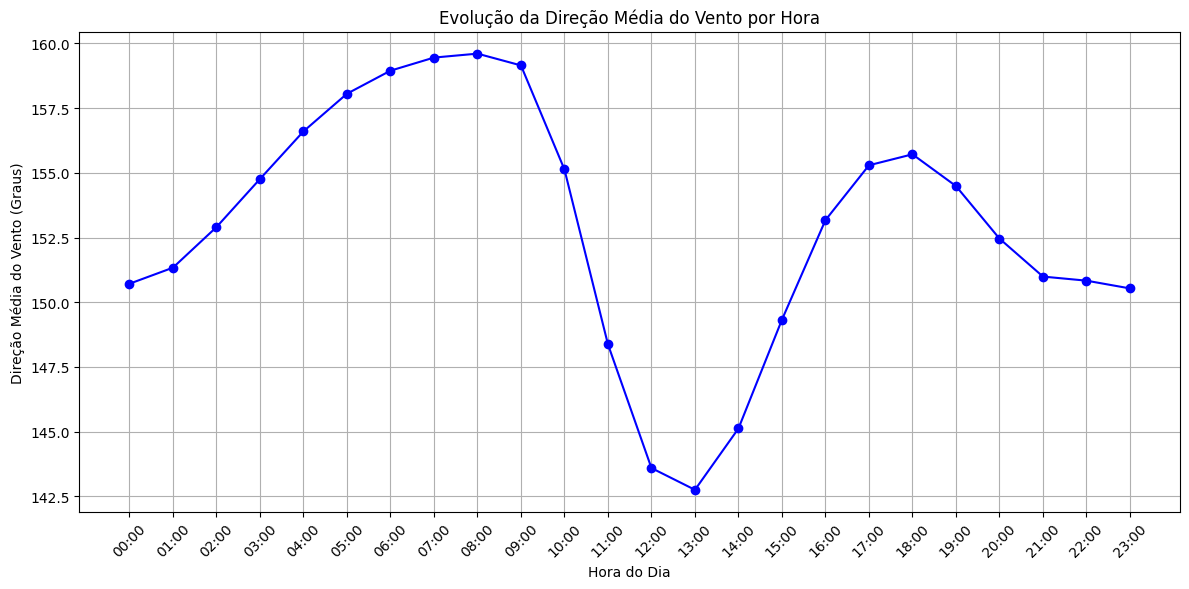

In [21]:
avg_wind_dir_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("HourlyWindDirectionRadiusDegrees").alias("Average Wind Direction")
).orderBy("Hour")

result_wind_dir = avg_wind_dir_by_hour.collect()

hours = [row['Hour'] for row in result_wind_dir]
average_wind_directions = [row['Average Wind Direction'] for row in result_wind_dir]

plt.figure(figsize=(12, 6))
plt.plot(hours, average_wind_directions, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Direção Média do Vento por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Direção Média do Vento (Graus)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

Em relação à evolução da direção média do vento (registada por hora), observamos que a direção do vento (ângulo em graus) é muito mais elevada no período da manhã, atingindo o pico máximo às 8h, onde a direção do vento é quase 160 graus. A partir das 9h ocorre uma descida abrupta, atingindo o mínimo absoluto às 13h (próximo dos 142.5 graus). A partir dessa hora volta a subir novamente até às 18h, onde ocorre uma descida gradual até às 23h. A maior diferença da direção média do vento (8h relativamente às 13h) é dada por quase 20 graus.

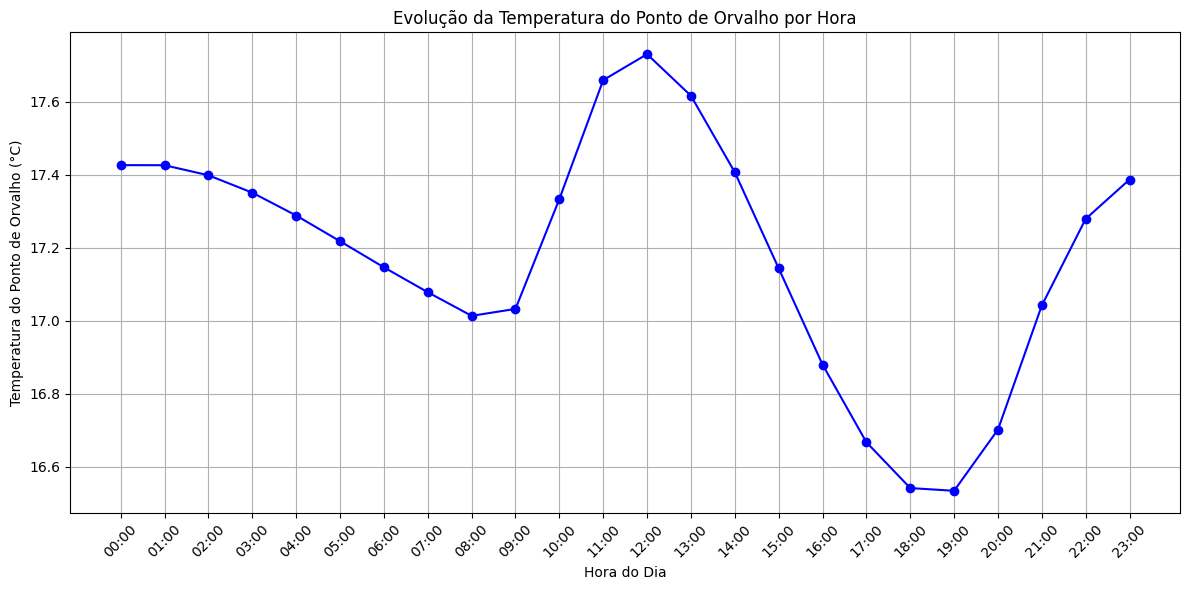

In [22]:
avg_dew_point_by_hour = df_all_stations.groupBy("Hour").agg(
    avg("DewPointTemperatureC").alias("Average Dew Point Temperature")
).orderBy("Hour")

# Coletar os dados
result_dew_point = avg_dew_point_by_hour.collect()

# Preparar dados para plotagem
hours = [row['Hour'] for row in result_dew_point]
average_dew_point_temperatures = [row['Average Dew Point Temperature'] for row in result_dew_point]

# Plotar o gráfico da temperatura média do ponto de orvalho por hora
plt.figure(figsize=(12, 6))
plt.plot(hours, average_dew_point_temperatures, linestyle='-', marker='o', color='blue')
plt.title('Evolução da Temperatura do Ponto de Orvalho por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura do Ponto de Orvalho (°C)')
plt.grid(True)
plt.xticks(hours, rotation=45)
plt.tight_layout()
plt.show()

Na evolução da temperatura do ponto de orvalho, registada por hora, é possível observar o pico máximo às 12h e o mínimo às 19h, chegando a temperaturas superiores a 17.6 ºC e inferiores a 16.6 ºC, respetivamente. Sendo que entre esse horário, ou seja, das 12h às 19h, é onde ocorre a maior diferença da temperatura. A partir das 19h, a temperatura começa novamente a subir atingindo um novo pico às 00h, onde começa a descer gradualmente até às 8h da manhã.

#### **Barplots**

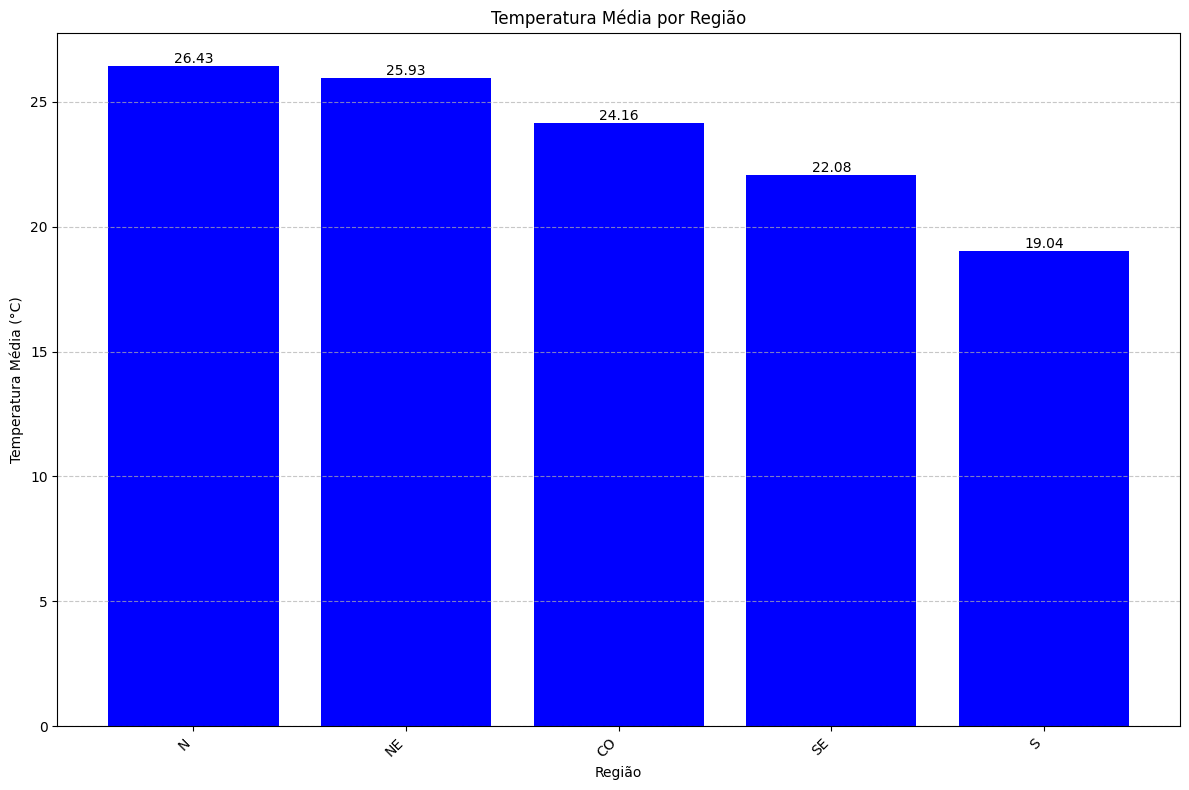

In [23]:
avg_temp_by_region = df_all_stations.groupBy("Region").agg(
    avg("AverageTemperatureC").alias("Average Temperature")
)

result_temp_region = avg_temp_by_region.collect()

sorted_result = sorted(result_temp_region, key=lambda x: x['Average Temperature'], reverse=True)

regions = [row['Region'] for row in sorted_result]
average_temperatures = [row['Average Temperature'] for row in sorted_result]

plt.figure(figsize=(12, 8))
bars = plt.bar(regions, average_temperatures, color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Temperatura Média por Região')
plt.xlabel('Região')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A partir deste gráfico, observamos uma diferença significativa na temperatura média entre regiões. A região que regista a maior temperatura média (26.43 ºC) é o Norte, o que faz sentido uma vez que que a região Norte é a região do Brasil mais próxima da linha do Equador. A região que regista a menor temperatura é o Sul, tendo uma temperatura média de 19.04 ºC. A diferença média da temperatura entre o Norte e o Sul é de 7.39 ºC. Podemos concluir que as regiões mais próximas da linha do Equador registam temperaturas mais altas, enquanto que regiões mais afastadas registam temperaturas inferiores.

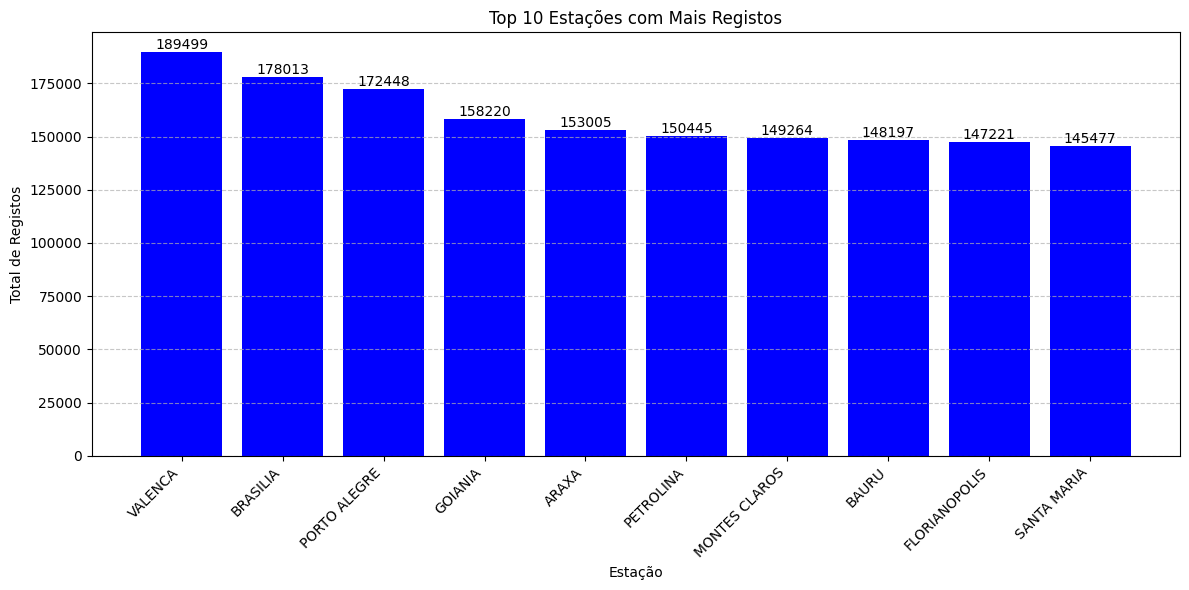

In [36]:
station_record_count = df_all_stations.groupBy("Station").agg(
    count("*").alias("Total Records")
).orderBy("Total Records", ascending=False).limit(10)

result_top_10 = station_record_count.collect()

stations = [row['Station'] for row in result_top_10]
total_records = [row['Total Records'] for row in result_top_10]

plt.figure(figsize=(12, 6))
bars = plt.bar(stations, total_records, color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Top 10 Estações com Mais Registos')
plt.xlabel('Estação')
plt.ylabel('Total de Registos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aqui podemos observar as 10 estações com o maior número total de registos. A estação com maior número de registos é VALENCIA, tendo um total de 189499 registos, enquanto que a estação no último lugar deste top 10 (SANTA MARIA) contém um total de 145477 registos; o que ainda apresenta uma diferença de 44022 registos em relação à estação de VALENCIA. Também podemos verificar que ocorre um salto significativo no número de registos das estações do top 3 para as restantes.

## **4. Análise dos resultados de Modeling**

In [25]:
# Leitura dos datasets com as previsões no dataset de validação
df_modeling_regression = spark.read.parquet("regression_model_results.parquet")
df_modeling_classification = spark.read.parquet("classification_model_results.parquet")

#### Time series com a evolução dos valores médios reais da temperatura e dos valores previstos

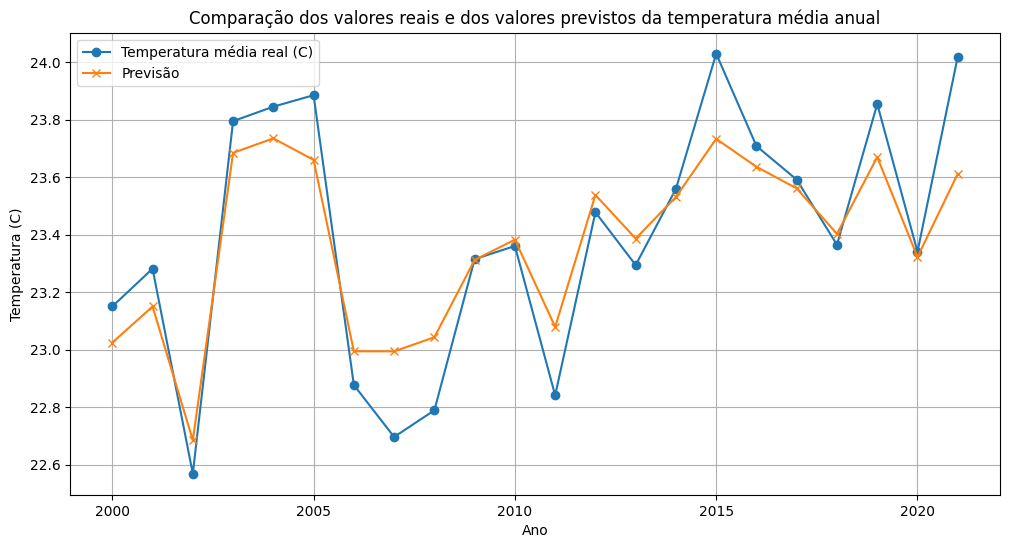

In [26]:
# extrair o ano da coluna Date
df_modeling_regression = df_modeling_regression.withColumn('Year', F.year('Date'))

# agrupar por ano e calcular as médias
annual_avg = df_modeling_regression.groupBy('Year').agg(
    F.avg('AverageTemperatureC').alias('AvgTemperature'),
    F.avg('prediction').alias('AvgPrediction')
).orderBy('Year')

# converter para pandas
pdf = annual_avg.toPandas()

# médias anuais de temperatura e previsão
plt.figure(figsize=(12, 6))
plt.plot(pdf['Year'], pdf['AvgTemperature'], label='Temperatura média real (C)', marker='o')
plt.plot(pdf['Year'], pdf['AvgPrediction'], label='Previsão', marker='x')

# títulos e rótulos
plt.title('Comparação dos valores reais e dos valores previstos da temperatura média anual')
plt.xlabel('Ano')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.grid(True)
plt.show()

A previsão gerada pelo modelo é bastante precisa, conforme demonstrado no gráfico acima. A projeção da temperatura média anual mostra uma boa precisão, acompanhando a tendência de aumento gradual observada entre 2000 e 2020. Apesar de algumas discrepâncias pontuais, como em 2007, o erro de previsão mantém-se relativamente pequeno.

#### Time series com a evolução do número total de ocorrências de chuva registadas pelas estações por ano vs previsões 

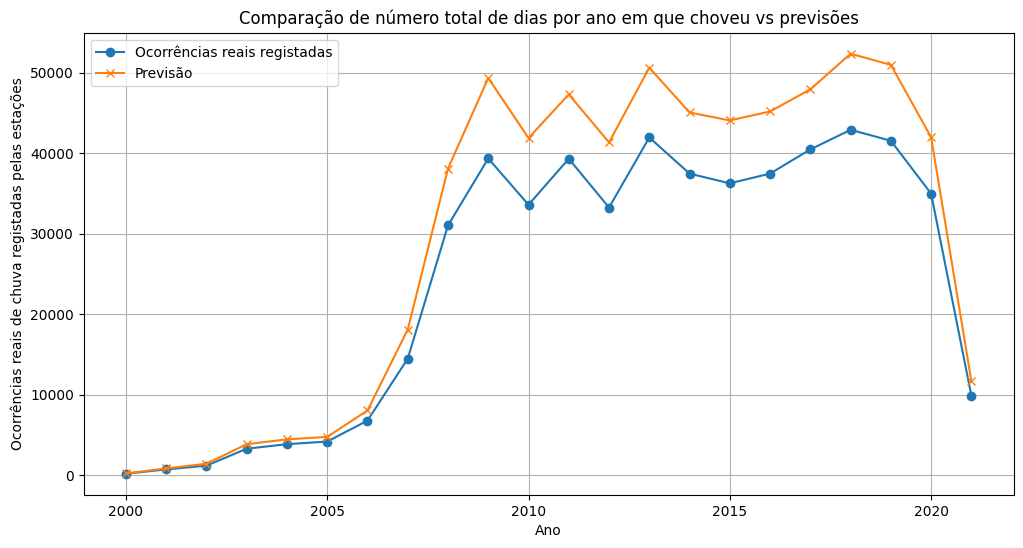

In [30]:
# Extrair o ano da coluna Date
df_modeling_classification = df_modeling_classification.withColumn('Year', F.year('Date'))

# Agrupar por ano e calcular as somas
annual_sum = df_modeling_classification.groupBy('Year').agg(
    F.sum('Rains').alias('TotalRain'),
    F.sum('prediction').alias('TotalPrediction')
).orderBy('Year')

# Converter para Pandas para facilitar a plotagem
pdf = annual_sum.toPandas()

# Plotar as somas anuais de precipitação e previsão
plt.figure(figsize=(12, 6))
plt.plot(pdf['Year'], pdf['TotalRain'], label='Ocorrências reais registadas', marker='o')
plt.plot(pdf['Year'], pdf['TotalPrediction'], label='Previsão', marker='x')

# Adicionar títulos e rótulos
plt.title('Comparação de número total de dias por ano em que choveu vs previsões')
plt.xlabel('Ano')
plt.ylabel('Ocorrências reais de chuva registadas pelas estações')
plt.legend()
plt.grid(True)
plt.show()

Em relação ao total de ocorrências reais de chuva que são previstas pelo modelo, o mesmo continua a obter bons resultados, embora tenha um desempenho melhor para anos em que as ocorrências foram inferiores se comparados com anos em que tiveram mais de 3000 chuvas registadas no qual são normalmente previstas 1000 chuvas a mais.

## **Principais conclusões**

Durante a fase de importação e depuração dos dados, realizámos a leitura dos conjuntos de dados e tratámos de problemas como os valores omissos. 

A seguir, na fase de análise exploratória dos dados, procurámos perceber as relações entre as variáveis meteorológicas, identificámos padrões e observámos a distribuição de algumas variáveis, como a temperatura, humidade, pressão atmosférica, entre outras.

Na fase de treino e afinação do modelo, dividimos os dados em conjuntos de treino, teste e validação. Desenvolvemos um modelo de regressão para prever a temperatura média por hora e um modelo de classificação para prever a ocorrência de chuva numa determinada hora. Utilizámos o RandomForestRegressor para o modelo de regressão e o SVM para o modelo de classificação. 
Para o modelo de regressão, as métricas de desempenho, como RMSE, MSE, MAE e R², indicaram valores por volta de 2°C para o RMSE e MAE, e aproximadamente 0.82 para o R². Esses resultados são bons, pois demonstram que os modelos conseguem capturar os padrões nos dados de temperatura.
Quanto ao modelo de classificação, as métricas de desempenho, como AUC, precisão, recall e F1-Score, mostraram valores em torno de 0.83 para AUC e accuracy, e aproximadamente 0.77 para recall, precisão e F1-Score. Estes resultados também são bons, o que indica uam boa capacidade do modelo em distinguir as classes positiva e negativa, com uma taxa de precisão relativamente alta.

Na fase de aplicação do modelo, usámos os modelos treinados para fazer previsões em novos conjuntos de dados de validação. Os resultados obtidos sugerem um bom ajuste dos modelos aos dados.